In [0]:
pip install tensorflow keras sklearn matplotlib pandas pillow


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [0]:

data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)

        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [4]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39259, 30, 30, 3) (39259,)
(31407, 30, 30, 3) (7852, 30, 30, 3) (31407,) (7852,)


In [0]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15
982/982 [==============================] - 4s 4ms/step - loss: 2.1708 - accuracy: 0.4234 - val_loss: 0.9263 - val_accuracy: 0.7598
Epoch 2/15
982/982 [==============================] - 4s 4ms/step - loss: 1.0043 - accuracy: 0.6969 - val_loss: 0.4249 - val_accuracy: 0.8761
Epoch 3/15
982/982 [==============================] - 4s 4ms/step - loss: 0.7324 - accuracy: 0.7785 - val_loss: 0.3908 - val_accuracy: 0.8979
Epoch 4/15
982/982 [==============================] - 4s 4ms/step - loss: 0.6020 - accuracy: 0.8162 - val_loss: 0.2664 - val_accuracy: 0.9210
Epoch 5/15
982/982 [==============================] - 4s 4ms/step - loss: 0.5305 - accuracy: 0.8360 - val_loss: 0.2165 - val_accuracy: 0.9387
Epoch 6/15
982/982 [==============================] - 4s 4ms/step - loss: 0.4783 - accuracy: 0.8534 - val_loss: 0.1688 - val_accuracy: 0.9530
Epoch 7/15
982/982 [==============================] - 4s 4ms/step - loss: 0.4437 - accuracy: 0.8665 - val_loss: 0.2009 - val_accuracy: 0.9473
Epoch 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


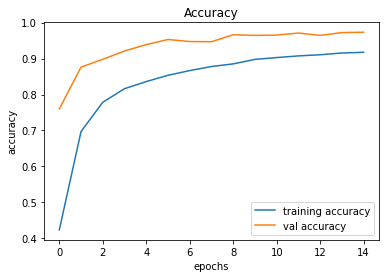

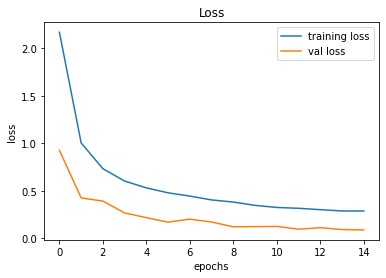

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:


y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test.csv')


In [0]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

pimgs='/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/'+imgs

In [13]:
print(pimgs)

['/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/00000.png'
 '/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/00001.png'
 '/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/00002.png'
 ...
 '/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/12627.png'
 '/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/12628.png'
 '/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/12629.png']


In [0]:
from sklearn.metrics import accuracy_score

In [15]:

data=[]
for img in pimgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

    print(img)
X_test=np.array(data)
pred = model.predict_classes(X_test)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07631.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07632.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07633.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07634.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07635.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07636.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07637.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/Test/07638.png
/content/drive/My Drive/Colab Notebooks/project_deepLearning/Traffic sign classification/T

NameError: ignored

In [19]:
pred = model.predict_classes(X_test)


NameError: ignored

In [17]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')

NameError: ignored

ERROR! Session/line number was not unique in database. History logging moved to new session 59
